In [71]:
# Install
!pip install keras

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
# Provide the directory path
directory_path = '/content/drive/My Drive/Colab Notebooks/NNDL/Week_7/NNDL_Lesson7_SourceCode/'

# List files in the directory
!ls "$directory_path"

basicOP.py  breastcancer.csv  BreastCancer.csv	diabetes.csv  imageclassification.py


In [73]:
# Imports
# Keras related
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical

# sklearn related
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# pandas, numpy
import pandas as pd
import numpy as np

# Plotting - visualizations
import matplotlib.pyplot as plt

In [74]:
diabetes_csv_path = "/content/drive/My Drive/Colab Notebooks/NNDL/Week_7/NNDL_Lesson7_SourceCode/diabetes.csv"
breastcancer_csv_path = "/content/drive/My Drive/Colab Notebooks/NNDL/Week_7/NNDL_Lesson7_SourceCode/breastcancer.csv"

In [76]:
"""
1.1 Use the use case in the class:
a. Add more Dense layers to the existing code and check how the accuracy changes.
"""

# Read diabetes dataset
diabetes_dataset = pd.read_csv(diabetes_csv_path, header=None).values

# Split the dataset X and Y
X = diabetes_dataset[:, 0:8]
Y = diabetes_dataset[:, 8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

# Set some seed
np.random.seed(155)

# Create model
diabetes_model = Sequential()

# Add layers
diabetes_model.add(Dense(64, input_dim=8, activation='relu'))  # Input layer
diabetes_model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
diabetes_model.add(Dense(32, activation='relu'))  # Hidden layer
diabetes_model.add(Dense(16, activation='relu'))  # Hidden layer
diabetes_model.add(Dense(8, activation='relu'))   # Hidden layer
diabetes_model.add(Dense(4, activation='relu'))   # Hidden layer
diabetes_model.add(Dense(1, activation='sigmoid'))  # Output layer

# Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile
diabetes_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train
diabetes_result = diabetes_model.fit(X_train, Y_train, epochs=100, initial_epoch=0)

# Evaluate
evaluation = diabetes_model.evaluate(X_test, Y_test)

diabetes_model.summary()
print('\nLoss: {}, Accuracy: {}'.format(evaluation[0], evaluation[1]))

Epoch 1/100
18/18 [==============================] - 2s 4ms/step - loss: 1.0170 - accuracy: 0.5365
Epoch 2/100
18/18 [==============================] - 0s 9ms/step - loss: 0.6583 - accuracy: 0.6615
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6543 - accuracy: 0.6615
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6474 - accuracy: 0.6615
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6615
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6615
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6405 - accuracy: 0.6615
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6615
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6403 - accuracy: 0.6615
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6615
Epoch 11/

In [77]:
"""
1.2 Change the data source to Breast Cancer dataset * available in the source code folder and make required changes.
Report accuracy of the model.
"""

# Read breastcancer dataset
breastcancer_dataset = pd.read_csv(breastcancer_csv_path)
breastcancer_dataset = breastcancer_dataset.dropna(axis=1)

# Map target labels to 'M' and 'B'
label_encoder = LabelEncoder()
breastcancer_dataset['diagnosis'] = label_encoder.fit_transform(breastcancer_dataset['diagnosis'])

# # Split the dataset X and Y
X = breastcancer_dataset.drop('diagnosis', axis=1)
Y = breastcancer_dataset['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

# Set some seed
np.random.seed(155)

# Create model
breastcancer = Sequential()

# Add layers
breastcancer.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # Input layer
breastcancer.add(Dropout(0.2))  # Dropout layer to prevent overfitting
breastcancer.add(Dense(32, activation='relu'))  # Hidden layer
breastcancer.add(Dense(16, activation='relu'))  # Hidden layer
breastcancer.add(Dense(8, activation='relu'))   # Hidden layer
breastcancer.add(Dense(4, activation='relu'))   # Hidden layer
breastcancer.add(Dense(1, activation='sigmoid'))  # Output layer

# Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile
breastcancer.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train
breastcancer_result = breastcancer.fit(X_train, Y_train, epochs=100, initial_epoch=0)

# Evaluate
evaluation = breastcancer.evaluate(X_test, Y_test)

breastcancer.summary()
print('\nLoss: {}, Accuracy: {}'.format(evaluation[0], evaluation[1]))

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 294506548781398092165414912.0000 - accuracy: 0.5587
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.6197
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.6197
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6197
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6197
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6197
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6647 - accuracy: 0.6197
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6197
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.6197
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6644 - 

In [78]:
# # Read breastcancer dataset
# breastcancer_dataset = pd.read_csv(breastcancer_csv_path)
# breastcancer_dataset = breastcancer_dataset.dropna(axis=1)

# print('Shape: {}'.format(breastcancer_dataset.shape))
# print('Count: {}'.format(len(breastcancer_dataset.columns)))

# for column in breastcancer_dataset.columns:
#     nan_count = breastcancer_dataset[column].isna().sum()
#     print("Column: {}, NaN count: {}".format(column, nan_count))

Shape: (569, 32)
Count: 32
Column: id, NaN count: 0
Column: diagnosis, NaN count: 0
Column: radius_mean, NaN count: 0
Column: texture_mean, NaN count: 0
Column: perimeter_mean, NaN count: 0
Column: area_mean, NaN count: 0
Column: smoothness_mean, NaN count: 0
Column: compactness_mean, NaN count: 0
Column: concavity_mean, NaN count: 0
Column: concave points_mean, NaN count: 0
Column: symmetry_mean, NaN count: 0
Column: fractal_dimension_mean, NaN count: 0
Column: radius_se, NaN count: 0
Column: texture_se, NaN count: 0
Column: perimeter_se, NaN count: 0
Column: area_se, NaN count: 0
Column: smoothness_se, NaN count: 0
Column: compactness_se, NaN count: 0
Column: concavity_se, NaN count: 0
Column: concave points_se, NaN count: 0
Column: symmetry_se, NaN count: 0
Column: fractal_dimension_se, NaN count: 0
Column: radius_worst, NaN count: 0
Column: texture_worst, NaN count: 0
Column: perimeter_worst, NaN count: 0
Column: area_worst, NaN count: 0
Column: smoothness_worst, NaN count: 0
Colum

In [79]:
"""
1.3 Normalize the data before feeding the data to the model and check how the normalization change your accuracy (code given below).

from sklearn.preprocessing
import StandardScaler
sc = StandardScaler()
"""

# Read breastcancer dataset
breastcancer_dataset = pd.read_csv(breastcancer_csv_path)
breastcancer_dataset = breastcancer_dataset.dropna(axis=1)

# Map target labels to 'M' and 'B'
label_encoder = LabelEncoder()
breastcancer_dataset['diagnosis'] = label_encoder.fit_transform(breastcancer_dataset['diagnosis'])

# Normalize the input features
sc = StandardScaler()
X_normalized = sc.fit_transform(breastcancer_dataset.drop('diagnosis', axis=1))

# Split the dataset X and Y
X = X_normalized
Y = breastcancer_dataset['diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

# Set some seed
np.random.seed(155)

# Create model
breastcancer = Sequential()

# Add layers
breastcancer.add(Dense(64, input_dim=X.shape[1], activation='relu'))  # Input layer
breastcancer.add(Dropout(0.2))  # Dropout layer to prevent overfitting
breastcancer.add(Dense(32, activation='relu'))  # Hidden layer
breastcancer.add(Dense(16, activation='relu'))  # Hidden layer
breastcancer.add(Dense(8, activation='relu'))   # Hidden layer
breastcancer.add(Dense(4, activation='relu'))   # Hidden layer
breastcancer.add(Dense(1, activation='sigmoid'))  # Output layer

# Optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compile
breastcancer.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Train
breastcancer_result = breastcancer.fit(X_train, Y_train, epochs=100, initial_epoch=0)

# Evaluate
evaluation = breastcancer.evaluate(X_test, Y_test)

breastcancer.summary()
print('\nLoss: {}, Accuracy: {}'.format(evaluation[0], evaluation[1]))

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6436 - accuracy: 0.6221
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.6502
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8920
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.9437
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.2167 - accuracy: 0.9577
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.9624
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1230 - accuracy: 0.9554
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9718
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9765
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9812
Epoch 11/

In [82]:
# Load imageclassification mnist dataset
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape[1:])

#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 14s 50ms/step - loss: 0.2910 - accuracy: 0.9117 - val_loss: 0.1500 - val_accuracy: 0.9531
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0995 - accuracy: 0.9700 - val_loss: 0.0869 - val_accuracy: 0.9737
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0889 - val_accuracy: 0.9727
Epoch 4/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0802 - val_accuracy: 0.9772
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0859 - val_accuracy: 0.9737
Epoch 6/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0235 - accuracy: 0.9927 - val_loss: 0.0712 - val_accuracy: 0.9799
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0726 - val_ac

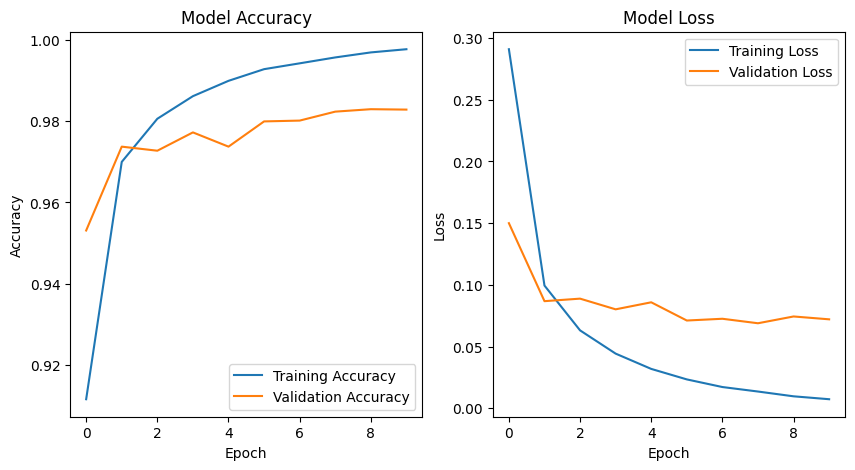

In [83]:
"""
2.1 Plot the loss and accuracy for both training data and validation data using the history object in the source code.
"""
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

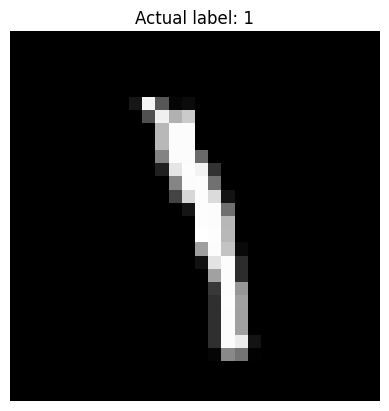

1/1 [==============================] - 0s 85ms/step

Model Prediction: 9


In [85]:
"""
2.2 Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.
"""
idx = np.random.randint(0, len(X_test))
image = test_images[idx]
label = test_labels[idx]

plt.imshow(image, cmap='gray')
plt.title('Actual label: {}'.format(label))
plt.axis('off')
plt.show()

# Reshape image and perform inference
image_flat = image.flatten()  # Flatten the image
prediction = np.argmax(model.predict(image_flat[np.newaxis, :]))
print('\nModel Prediction: {}'.format(prediction))

In [ ]:
# Reuse methods

num_hidden_layers = [1, 3]  # Try different numbers of hidden layers
activations = ['tanh', 'sigmoid']  # Try different activation functions

# Define the model
def create_model(num_hidden_layers=2, activation='relu'):
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(dimData,)))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(512, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [88]:
"""
2.3 We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.
"""
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Process the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255.0
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255.0
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Train and evaluate the model with different configurations
for num_layers in num_hidden_layers:
    for activation in activations:
        print("\nTraining model with {} hidden layers and {} activation function".format(num_layers, activation))
        model = create_model(num_hidden_layers=num_layers, activation=activation)
        history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                            validation_data=(test_data, test_labels_one_hot))


Training model with 1 hidden layers and tanh activation function
Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.3843 - accuracy: 0.8864 - val_loss: 0.2826 - val_accuracy: 0.9158
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2329 - accuracy: 0.9323 - val_loss: 0.1985 - val_accuracy: 0.9420
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1692 - accuracy: 0.9505 - val_loss: 0.1594 - val_accuracy: 0.9525
Epoch 4/10
235/235 [==============================] - 4s 17ms/step - loss: 0.1290 - accuracy: 0.9627 - val_loss: 0.1300 - val_accuracy: 0.9614
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1023 - accuracy: 0.9707 - val_loss: 0.1039 - val_accuracy: 0.9688
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0841 - accuracy: 0.9753 - val_loss: 0.0994 - val_accuracy: 0.9700
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0

In [89]:
"""
2.4 Run the same code without scaling the images and check the performance
"""
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Process the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32')
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

for num_layers in num_hidden_layers:
    for activation in activations:
        print("\nTraining model with {} hidden layers and {} activation function".format(num_layers, activation))
        model = create_model(num_hidden_layers=num_layers, activation=activation)
        history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                            validation_data=(test_data, test_labels_one_hot))


Training model with 1 hidden layers and tanh activation function
Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.4227 - accuracy: 0.8728 - val_loss: 0.2778 - val_accuracy: 0.9150
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2493 - accuracy: 0.9246 - val_loss: 0.2308 - val_accuracy: 0.9334
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.2119 - accuracy: 0.9363 - val_loss: 0.1920 - val_accuracy: 0.9408
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1863 - accuracy: 0.9442 - val_loss: 0.1824 - val_accuracy: 0.9433
Epoch 5/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1697 - accuracy: 0.9484 - val_loss: 0.1701 - val_accuracy: 0.9487
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.1585 - accuracy: 0.9527 - val_loss: 0.1571 - val_accuracy: 0.9544
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0